In [2]:
# prepare environment
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from math import sqrt
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.feature_selection import f_regression 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
from pydataset import data

In [4]:
#1 load tips dataset
df = data('tips')
df.head(1)

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2


In [5]:
x = df.total_bill
y = df.tip

In [42]:
#2a,b
ols_model = ols('tip~total_bill',data=df).fit()

df['yhat'] = ols_model.predict(pd.DataFrame(df.total_bill))

In [43]:
df.head(1)
df['residual'] = df['yhat']-df['tip']
df['residual2'] = df.residual **2
df.head(1)

,total_bill,tip,sex,smoker,day,time,size,yhat,residual,residual2,tip_percent
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,1.694636,2.871792,0.059447


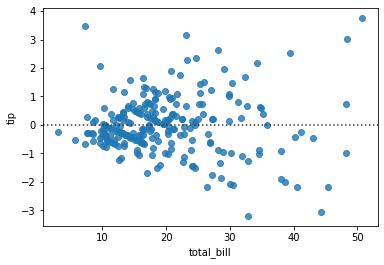

In [45]:
#4 plot residuals
sns.residplot(df.total_bill,df.tip)

In [54]:
#5 regression errors, SSE, ESS, TSS, MSE, RMSE
def regression_errors(y,yhat):
    SSE = sum(df['residual2'])
    SSE2 = sum((yhat-y)**2)
    ESS = sum((yhat - y.mean())**2)
    TSS = ESS + SSE
    MSE = SSE/len(df)
    RMSE = sqrt(MSE)
    return SSE,SSE2,MSE,RMSE,ESS,TSS

In [55]:
regression_errors(df.tip,df.yhat)

(252.78874385077603,
 252.78874385077603,
 1.036019442011377,
 1.0178504025697377,
 212.4237331984042,
 465.2124770491802)

In [ ]:
#calculate baseline
df['tip_baseline_med'] = df['tip'].median()

In [11]:
df_baseline = df[['total_bill','tip']]
df_baseline['yhat'] = df_baseline['tip'].mean()
df_baseline['residual'] = df_baseline['yhat'] - df_baseline['tip']
df_baseline['residual2'] = df_baseline['residual'] ** 2
df_baseline.head(1)

,total_bill,tip,yhat,residual,residual2
1,16.99,1.01,2.998279,1.988279,3.953252


In [47]:
#regression errors
SSE_bl = sum(df_baseline['residual2'])
MSE_bl = SSE_bl/len(df_baseline)
RMSE_bl = sqrt(MSE_bl)
ESS_bl = sum((df_baseline.yhat - df_baseline.tip.mean())**2)
TSS_bl = ESS + SSE
print(SSE_bl,MSE_bl,RMSE_bl)

465.21247704918085 1.9066085124966428 1.3807999538298958


In [49]:
r2 = ESS/TSS
r2_bl = ESS_bl / TSS_bl
print(r2,r2_bl)

0.45661658635167623 0.0


In [20]:
df.head(5)

,total_bill,tip,sex,smoker,day,time,size,yhat,residual,residual2
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,1.694636,2.871792
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,0.346223,0.119870
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,-0.373165,0.139252
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,0.097250,0.009458
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,-0.107178,0.011487


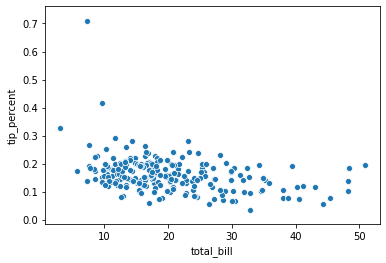

In [40]:
a = sns.scatterplot(x='total_bill',y='tip_percent',data=df)

In [26]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Tue, 15 Oct 2019   Prob (F-statistic):           6.69e-34
Time:                        09:25:28   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9203      0.160      5.761      0.000       0.606       1.235
x              0.1050      0.007     14.260      0.000       0.091       0.120
==============================================================================
Omnibus:                       20.185   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.750
Skew:                           0.443   Prob(JB):                     6.35e-09
Kurtosis:                       4.711   Cond. No.                         53.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

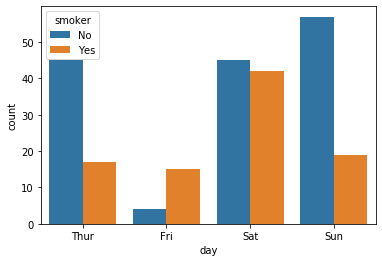

In [36]:
order = ['Thur','Fri','Sat','Sun']
sns.countplot(x='day',hue='smoker',data=df,order=order)

In [38]:
df['tip_percent'] = df.tip/df.total_bill

,total_bill,tip,sex,smoker,day,time,size,yhat,residual,residual2,tip_percent
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,1.694636,2.871792,0.059447
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,0.346223,0.119870,0.160542
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,-0.373165,0.139252,0.166587
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,0.097250,0.009458,0.139780
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,-0.107178,0.011487,0.146808


In [50]:
df['tip_baseline_med'] = df['tip'].median()

In [51]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,yhat,residual,residual2,tip_percent,tip_baseline_med
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,1.694636,2.871792,0.059447,2.9
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,0.346223,0.119870,0.160542,2.9
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,-0.373165,0.139252,0.166587,2.9
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,0.097250,0.009458,0.139780,2.9
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,-0.107178,0.011487,0.146808,2.9
